In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from datetime import datetime
import os

In [2]:
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing['data'], housing['target'],
                                                             test_size=0.20, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                     test_size=0.20, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_valid = target_scaler.transform(y_valid.reshape(-1, 1))
y_test = target_scaler.transform(y_test.reshape(-1, 1))

In [6]:
X_train.shape

(13209, 8)

In [7]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer='adam')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 203,401
Trainable params: 203,401
Non-trainable params: 0
_________________________________________________________________


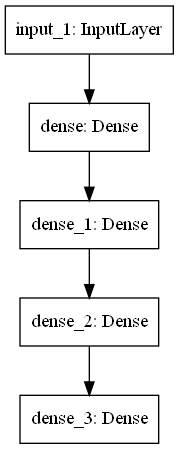

In [9]:
keras.utils.plot_model(model, to_file=os.path.join('Model Images', 'model_img.png'))

In [10]:
current_data = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
checkpoint_cb = keras.callbacks.ModelCheckpoint(os.path.join('Saved Models', f'{current_data}_model.h5'))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [11]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
413/413 [==============================] - 5s 10ms/step - loss: 0.4071 - val_loss: 0.3818
Epoch 2/100
413/413 [==============================] - 4s 10ms/step - loss: 0.3513 - val_loss: 0.3539
Epoch 3/100
413/413 [==============================] - 4s 10ms/step - loss: 0.3321 - val_loss: 0.3459
Epoch 4/100
413/413 [==============================] - 5s 11ms/step - loss: 0.3223 - val_loss: 0.3365
Epoch 5/100
413/413 [==============================] - 5s 12ms/step - loss: 0.3135 - val_loss: 0.3256
Epoch 6/100
413/413 [==============================] - 4s 9ms/step - loss: 0.3085 - val_loss: 0.3303
Epoch 7/100
413/413 [==============================] - 4s 9ms/step - loss: 0.3042 - val_loss: 0.3179
Epoch 8/100
413/413 [==============================] - 4s 9ms/step - loss: 0.3007 - val_loss: 0.3220
Epoch 9/100
413/413 [==============================] - 4s 10ms/step - loss: 0.2956 - val_loss: 0.3148
Epoch 10/100
413/413 [==============================] - 4s 9ms/step - loss: 0.2907 - 

In [12]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 1s 5ms/step - loss: 0.2882


0.2882494032382965

In [13]:
model.predict(X_test[:3])

array([[-1.4128544 ],
       [-0.97779053],
       [ 2.7343507 ]], dtype=float32)

In [14]:
y_test[:3]

array([[-1.38079066],
       [-1.39729153],
       [ 2.54729421]])